 # Using Pittsburgh Police Arrest Data to Choose The Best Pittsburgh Neighborhood

I think the best metric to use to determine the best neighborhood based off of arrest reports is simply the number of arrests. So each arrest is equal to 1 point, and the neighborhood with the least number of points is the safest and best neighborhood. Alternatively, it is possible to put in place a metric where some crimes are worth more points than others (Assault = 5 points and Public Intoxication = 2 points). This system would be flawed in that I would be determining what crimes are more or less abhorrent than others. Since I do not have a law degree and there are hundreds of unique arrest possibilities, I chose to keep the metric simple by recording the number of arrests per neighborhood.

In [3]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import geopy
import matplotlib.pyplot as plt

arrest_reports = pd.read_csv("pittarrestsdata.csv") #read the dataset

unarray = arrest_reports['INCIDENTNEIGHBORHOOD'].unique() #number of unique neighborhoods = 99

print(unarray)
print("-------------------------------------------------------------------")
print("The number of unique neighborhoods: ", len(unarray))



['Bloomfield' 'Outside City' 'Westwood' 'East Allegheny' 'Crafton Heights'
 'Greenfield' 'Brookline' 'Regent Square' 'East Liberty' nan 'East Hills'
 'Carrick' 'Allegheny Center' 'South Side Flats' 'Sheraden'
 'East Carnegie' 'Golden Triangle/Civic Arena' 'Point Breeze North'
 'Perry South' 'Allentown' 'North Shore' 'Marshall-Shadeland'
 'Central Oakland' 'Middle Hill' 'Strip District'
 'Lincoln-Lemington-Belmar' 'Central Northside' 'Troy Hill-Herrs Island'
 'Highland Park' 'Homewood North' 'Northview Heights' 'Brighton Heights'
 'Hazelwood' 'Perry North' 'Bedford Dwellings' 'Elliott' 'Beechview'
 'Fineview' 'Glen Hazel' 'Spring Hill-City View' 'Bluff' 'Manchester'
 'Homewood West' 'Outside County' 'Point Breeze' 'Homewood South'
 'Squirrel Hill South' 'Terrace Village' 'Upper Lawrenceville' 'Arlington'
 'South Side Slopes' 'Lower Lawrenceville' 'Garfield' 'Lincoln Place'
 'Larimer' 'Mount Washington' 'California-Kirkbride' 'Banksville'
 'Bon Air' 'South Shore' 'Beltzhoover' 'Knoxville

## **The output from the code cell above will show us how many neighborhoods the Pittsburgh Police use to record arrests. There are 99 neighborhoods and each is listed above in an array.**

In [4]:
#all neighborhoods in dataset including duplicates
num_array = arrest_reports['INCIDENTNEIGHBORHOOD'] #grab every neighborhood including duplicates
arrest_counts = pd.Series(num_array).value_counts() #count the number of times a neighborhood appears
print(arrest_counts)

Central Business District    2886
South Side Flats             2421
Carrick                      1699
East Allegheny               1580
Homewood South               1558
                             ... 
Central Northside              23
Regent Square                  23
Mt. Oliver Boro                17
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: INCIDENTNEIGHBORHOOD, Length: 98, dtype: int64


## **Using a series that includes every neighborhood including duplicates, we use the value_counts function to record how many times each neighborhood appears in the series. The top and bottom 5 neighborhoods in terms of number of arrests are listed above.**

Now this data is interesting, but is it actually useful?... Not really. The bottom five neighborhood might have fewer than 30 arrests because there could be only 100 people in the neighborhood. It is unfair to compare a neighborhood with 20,000 residents to another with 100. To make this data useful, we will need to find the population of the 10 neighborhoods listed above and form a percentage of residents arrested. For example, if Oakland has 100 residents and there were 10 arrests, then there is an arrest rate of 10%. After calculating these arrest rates, we will compare the ten neighborhoods to determine the safest and best.

- Central Business District: (2,886/**5,201**) * 100 =------------------------>55.49%
- South Side Flats: (2,421/**6,736**) * 100 =--------------------------------->35.94%
- Carrick: (1,699/**15,642**) * 100 =----------------------------------------->10.86%
- East Allegheny: (1,580/**2,136**) * 100 =----------------------------------->73.97%
- Homewood South: (1,558/**3,662**) * 100 =----------------------------------->42.55%

- Regent Square: (23/**4,067**) * 100 =--------------------------------------->0.57%
- Central Northside: (23/**2,959**) * 100 =----------------------------------->0.78%
- Mt. Oliver Boro and Mt. Oliver Neighborhood: (19/**3,324**) * 100 =--------->0.57%
- Troy Hill-Herrs Island: (6/**2,714**) * 100 =------------------------------->0.22%

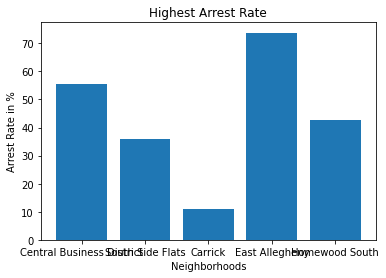

In [5]:
neighborhood = ['Central Business District', 'South Side Flats', 'Carrick', 'East Allegheny', 'Homewood South']
arrest_rate = [55.49, 35.94, 10.86, 73.79, 42.55]
plt.bar(neighborhood, arrest_rate)
plt.title('Highest Arrest Rate')
plt.xlabel('Neighborhoods')
plt.ylabel('Arrest Rate in %')
plt.show()

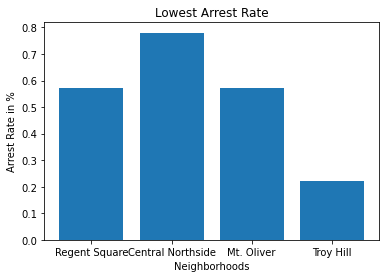

In [6]:
neighborhood2 = ['Regent Square', 'Central Northside', 'Mt. Oliver', 'Troy Hill']
arrests2 = [0.57, 0.78, 0.57, 0.22]
plt.bar(neighborhood2, arrests2)
plt.title('Lowest Arrest Rate')
plt.xlabel('Neighborhoods')
plt.ylabel('Arrest Rate in %')
plt.show()